#### Load simexpal results

In [29]:
import matplotlib.pyplot as plt
import simexpal
import yaml
import subprocess

cfg = simexpal.config_for_dir() # load expermiments.yml

results = []
for run in cfg.collect_successful_results():  # load successfull results from output/*
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

#### Helper function

In [30]:
def speedup(threads, scalability):
    assert(threads in [1, 2, 4, 8, 16, 32])
    f = list(filter(lambda x: x['scalability'] == scalability, results))
    time_1 = list(filter(lambda x: x['num_threads'] == 1, f))[0]['time']
    time_t = list(filter(lambda x: x['num_threads'] == threads, f))[0]['time']
    return time_1 / time_t

# Exercise 5

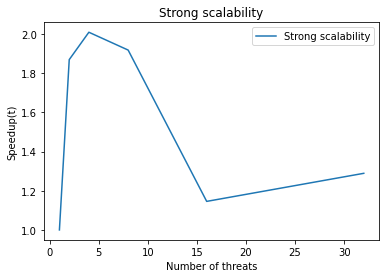

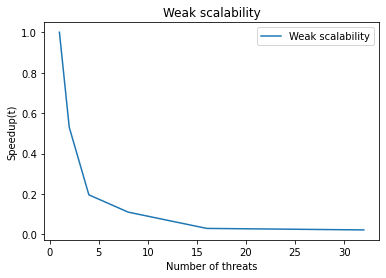

In [28]:
x = [1, 2, 4, 8, 16, 32]
y = []
for threads in x:
    y.append(speedup(threads, 'strong'))

# plot the insertion
plt.plot(x, y, label = 'Strong scalability')
plt.title('Strong scalability')
plt.xlabel('Number of threats')
plt.ylabel('Speedup(t)')
plt.legend()
plt.show()

y = []
for threads in x:
    y.append(speedup(threads, 'weak'))
    
plt.plot(x, y, label = 'Weak scalability')
plt.title('Weak scalability')
plt.xlabel('Number of threats')
plt.ylabel('Speedup(t)')
plt.legend()
plt.show()